In [28]:
import pandas as pd

df = pd.read_csv("c:/data/ram/ram_price.csv")
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'price ($/Mbyte)')

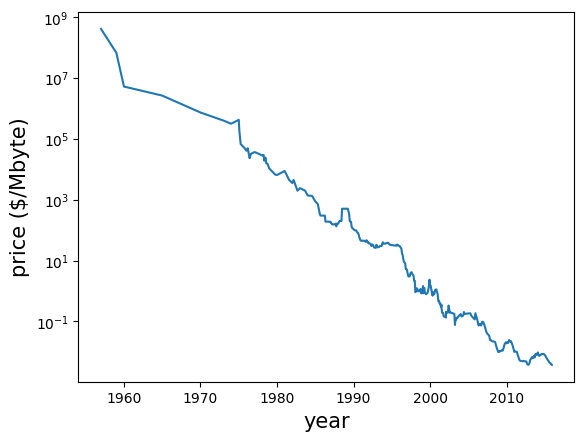

In [29]:
import matplotlib.pyplot as plt

# y축 로그 스케일
plt.semilogy(df["date"], df["price"]) # 로그 단위로 변환
plt.xlabel("year", size=15)
plt.ylabel("price ($/Mbyte)", size=15)
# x축 날짜, y축 램 가격
# 시간이 지날수록 램 가격은 점차 하락하고 있음

In [35]:
import numpy as np

# 학습용과 검증용 구분(2000년 이전과 이후로 구분)
X_train0 = df[df["date"] < 2000]
X_test = df[df["date"] >= 2000]

X_train = X_train0["date"].values

# y값을 로그 스케일로 변환
y_train = np.log(X_train0["price"])
y_test = np.log(X_test["price"])

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

tree = DecisionTreeRegressor().fit(X_train.reshape(-1, 1), y_train)
#               트리 회귀모형       2차원
lr = LinearRegression().fit(X_train.reshape(-1, 1), y_train)  
# 선형회귀모형
# svr = SVR(kernel="linear").fit(X_train.reshape(-1, 1), y_train)
#       서포트벡터머신 : linear 선형모형
svr = SVR(kernel="rbf").fit(X_train.reshape(-1, 1), y_train)
#       서포트벡터머신 : rbf 곡선모형

# 전체 기간의 자료
x_all = np.array(df["date"]).reshape(-1, 1)

pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree)  # log값 되돌리기

pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr)  # log값 되돌리기

pred_svr = svr.predict(x_all)
price_svr = np.exp(pred_svr)  # log값 되돌리기

In [37]:
from sklearn.metrics import mean_squared_error

y_pred = tree.predict(X_test["price"].values.reshape(-1, 1)) # 출력값
rms = np.sqrt(mean_squared_error(y_test, y_pred)) # 제곱오차
print(rms) # 제곱근오차

y_pred = lr.predict(X_test["price"].values.reshape(-1, 1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = svr.predict(X_test["price"].values.reshape(-1, 1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

23.038370257895192
861.08402279523
10.42933757466685


Text(0, 0.5, 'price($/Mbyte)')

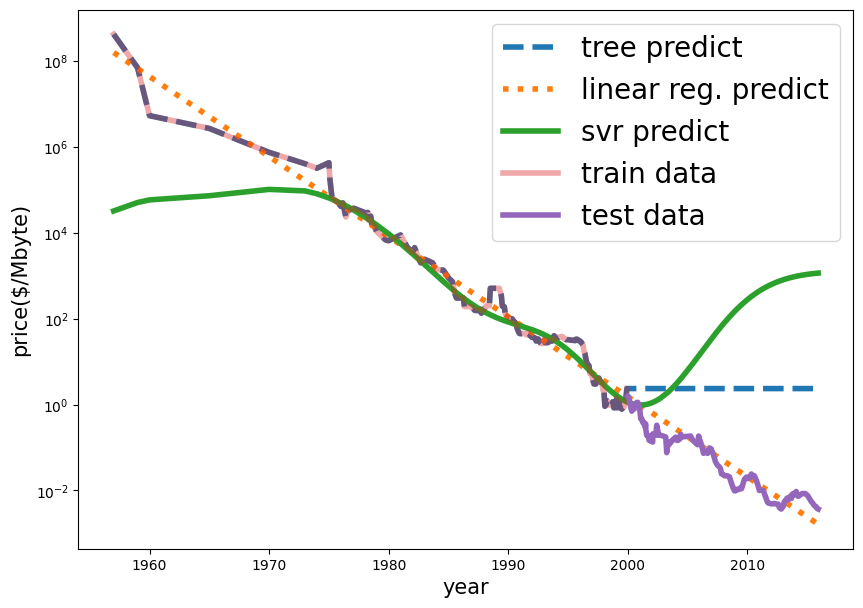

In [39]:
# 실제값과 결정트리모형의 예측값, 선형회귀모형의 예측값 비교
plt.figure(figsize=(10, 7))

plt.semilogy(df["date"], price_tree, label="tree predict", lw="4", ls="--")
plt.semilogy(df["date"], price_lr, label="linear reg. predict", lw="4", ls=":")
plt.semilogy(df["date"], price_svr, label="svr predict", lw="4", ls="-")
plt.semilogy(X_train0["date"], X_train0["price"], label="train data", lw="4", alpha=0.4)
plt.semilogy(X_test["date"], X_test["price"], lw="4", label="test data")

plt.legend(loc=1, fontsize=20)
plt.xlabel("year", size=15)
plt.ylabel("price($/Mbyte)", size=15)

# 선형회귀모형: 직선모양
# 결정트리모형은 학습용 데이터의 범위를 벗어나는 새로운 데이터를 예측할 능력이 없음(트리 모형의 단점)
# 새로운 데이터를 예측하려면 시계열분석, 순환신경망(RNN) 등을 사용하여 분석하는 방법을 사용해야 함